#Continued from `hysteresis_4.ipynb`.

I included a constant term in the loading-dose time, drawn from the baseline data in 10 or so PD patients from the 2003(?) publication.

Below is some work done in Maxima. See `hysteresis_symbolic_ode_v3.wxmx`.

unit_step(x) in Maxima is the left-continuous Heaviside unit step function, and
h2(x) is the right-continuous Heaviside unit step function:
```
h2(x):=1-unit_step(-x);
ln2:log(2);
cinf_est:590;
a0_est:55.4;
a1_est:250;
a2_est:6;
alpha_est:ln2/8;
beta_est:ln2/90;
bigb_est:450;
k_est:ln2/22;
```
For t<=tload:
```
cp_early(t):=a0+a1*t-a2*t^2;
```
$$Cp\_early(t)=-{\it a_2}\,t^2+{\it a_1}\,t+{\it a_0}$$
```
cpeak:cp_early(tload);
cp_late(t):=cinf + bigb*%e^(-beta*(t-tload)) + (cpeak-bigb-cinf)*%e^(-alpha*(t-tload));
```
$$Cp\_late(t)={\it bigb}\,e^ {- \beta\,\left(t-{\it tload}\right) }+\left(-{\it a_2}\,{\it tload}^2+{\it a_1}\,{\it tload}-{\it cinf}-{\it bigb}+{\it a_0}\right)\,e^ {- \alpha\,\left(t-{\it tload}\right) }+{\it cinf}$$
```
cp(t):=h2(t)*h2(tload-t)*cp_early(t)+unit_step(t-tload)*cp_late(t);

ce_early(t):= -(%e^(-k*t)*((a2*k^2*t^2+(-a1*k^2-2*a2*k)*t+a1*k+2*a2)*%e^(k*t)-a1*k-2*a2))/k^2;
```
$$Ce\_early(t)={{-e^ {- k\,t }\,\left(\left({\it a_2}\,k^2\,t^2+\left(-{\it a_1}\,k^2-2\,{\it a_2}\,k\right)\,t+{\it a_1}\,k+2\,{\it a_2}\right)\,e^{k\,t}-{\it a_1}\,k-2\,{\it a_2}\right)}\over{k^2}}"$$
```
ev(ce_peak,k=k_est,a2=a2_est,a1=a1_est,a0=a0_est,tload=10,numer,eval);
297.1881614453551
```

For t>tload:

$$Cp\_late(t)={\it bigb}\,e^ {- \beta\,\left(t-{\it tload}\right) }+\left(-{\it a_2}\,{\it tload}^2+{\it a_1}\,{\it tload}+{\it a_0}-{\it cinf}-{\it bigb}\right)\,e^ {- \alpha\,\left(t-{\it tload}\right) }+{\it cinf}$$


$$C_e'(t)=k(C_p(t) - C_e(t)) =k\left((Cinf+bigb\cdot e^{(-\beta (t-tload)}+ (Cpeak-bigb-Cinf) e^{-\alpha (t-tload)} - C_e(t)\right)$$

`(dy/dt)= k*(-y+bigb*%e^(-beta*(t-tload))+(-a2*tload^2+a1*tload-cinf-bigb+a0)*%e^(-alpha*(t-tload))+cinf)`

In solving this ODE, the program gives three warnings:
```
`"Is "(beta+alpha)/(k-beta-alpha)" equal to "-1"?"` no;

`"Is "beta/(k-beta-alpha)" equal to "-1"?"` no;

`"Is "alpha/(k-beta-alpha)" equal to "-1"?"` no;
```

Then we get:
```
ce_late(t)=
y=%e^(-k*t)*((bigb*k*%e^(beta*tload+(k-beta-alpha)*(alpha/(k-beta-alpha)+1)*t))/((k-beta-alpha)*(alpha/(k-beta-alpha)+1))+((-(a2*k*%e^((k-beta-alpha)*(beta/(k-beta-alpha)+1)*t)*tload^2)/(beta/(k-beta-alpha)+1)+(a1*k*%e^((k-beta-alpha)*(beta/(k-beta-alpha)+1)*t)*tload)/(beta/(k-beta-alpha)+1)+((-cinf-bigb+a0)*k*%e^((k-beta-alpha)*(beta/(k-beta-alpha)+1)*t))/(beta/(k-beta-alpha)+1))*%e^(alpha*tload))/(k-beta-alpha)+(cinf*k*%e^((k-beta-alpha)*((beta+alpha)/(k-beta-alpha)+1)*t))/((k-beta-alpha)*((beta+alpha)/(k-beta-alpha)+1))+%c)
```
$For t\ge t_{load}:$
$$C_e(t) = e^{-kt}\left[ \frac{kBe^{\beta\,t_{load}}}{k-\beta} e^{(k-\beta)t} + \frac{ke^{\alpha\,t_{load}}(a_0-C_{inf}-B+a_1t_{load}-a_2t_{load}^2)}{k-\alpha}e^{(k-\alpha)t} + C_{inf} e^{kt} + \%C \right]$$


where $\%C$ is set so that $C_e(t_{load}) = $ ce_peak.

```
$$y=-{{e^{-{{\beta^2\,{\it tload}}\over{k-\beta-\alpha}}-{{2\,\alpha\,\beta\,{\it tload}}\over{k-\beta-\alpha}}-{{\alpha^2\,{\it tload}}\over{k-\beta-\alpha}}-\beta\,{\it tload}-\alpha\,{\it tload}-k\,t-\beta\,t-\alpha\,t}\, \\
\left(\left({\it bigb}\,k^4-\alpha\,{\it bigb}\,k^3\right)\,e^{{{\alpha\,k\,{\it tload}}\over{k-\beta-\alpha}}+{{\beta^2\,{\it tload}}\over{k-\beta-\alpha}}+{{\alpha\,\beta\,{\it tload}}\over{k-\beta-\alpha}}+k\,{\it tload}+\beta\,{\it tload}+\beta\,t+\alpha\,t}+e^{{{\beta\,k\,{\it tload}}\over{k-\beta-\alpha}}}\,\left(\left({\it cinf}\,k^4+\left(-\beta-\alpha\right)\,{\it cinf}\,k^3+\alpha\,\beta\,{\it cinf}\,k^2\right)\,e^{{{\alpha\,k\,{\it tload}}\over{k-\beta-\alpha}}+k\,{\it tload}+\beta\,t+\alpha\,t}+\left(\left({\it a_2}\,\beta\,k^3-{\it a_2}\,k^4\right)\,e^{\beta\,t+\alpha\,t}\,{\it tload}^2+\left({\it a_1}\,k^4-{\it a_1}\,\beta\,k^3\right)\,e^{\beta\,t+\alpha\,t}\,{\it tload}+\left(\left(-{\it cinf}-{\it bigb}+{\it a_0}\right)\,k^4+\left(\beta\,{\it cinf}+\beta\,{\it bigb}-{\it a_0}\,\beta\right)\,k^3\right)\,e^{\beta\,t+\alpha\,t}\right)\,e^{{{\alpha\,\beta\,{\it tload}}\over{k-\beta-\alpha}}+{{\alpha^2\,{\it tload}}\over{k-\beta-\alpha}}+k\,{\it tload}+\alpha\,{\it tload}}\right)+\left(\left(\left({\it a_2}\,k^4+\left(-{\it a_2}\,\beta-{\it a_2}\,\alpha\right)\,k^3+{\it a_2}\,\alpha\,\beta\,k^2\right)\,e^{\beta\,t+\alpha\,t}\,{\it tload}^2+\left(-{\it a_1}\,k^4+\left({\it a_1}\,\beta+{\it a_1}\,\alpha-2\,{\it a_2}\right)\,k^3+\left(\left(2\,{\it a_2}-{\it a_1}\,\alpha\right)\,\beta+2\,{\it a_2}\,\alpha\right)\,k^2-2\,{\it a_2}\,\alpha\,\beta\,k\right)\,e^{\beta\,t+\alpha\,t}\,{\it tload}+\left({\it a_1}\,k^3+\left(-{\it a_1}\,\beta-{\it a_1}\,\alpha+2\,{\it a_2}\right)\,k^2+\left(\left({\it a_1}\,\alpha-2\,{\it a_2}\right)\,\beta-2\,{\it a_2}\,\alpha\right)\,k+2\,{\it a_2}\,\alpha\,\beta\right)\,e^{\beta\,t+\alpha\,t}\right)\,e^{k\,{\it tload}+\beta\,{\it tload}+\alpha\,{\it tload}}+\left(\alpha\,{\it bigb}\,k^3-{\it bigb}\,k^4\right)\,e^{2\,\beta\,{\it tload}+\alpha\,{\it tload}+k\,t+\alpha\,t}+\left(\left(\left({\it a_2}\,k^4-{\it a_2}\,\beta\,k^3\right)\,e^{k\,t+\beta\,t}\,{\it tload}^2+\left({\it a_1}\,\beta\,k^3-{\it a_1}\,k^4\right)\,e^{k\,t+\beta\,t}\,{\it tload}+\left(\left({\it cinf}+{\it bigb}-{\it a_0}\right)\,k^4+\left(-\beta\,{\it cinf}-\beta\,{\it bigb}+{\it a_0}\,\beta\right)\,k^3\right)\,e^{k\,t+\beta\,t}\right)\,e^{2\,\alpha\,{\it tload}}+\left(\left(-{\it cinf}\,k^4+\left(\beta+\alpha\right)\,{\it cinf}\,k^3-\alpha\,\beta\,{\it cinf}\,k^2\right)\,e^{k\,t+\beta\,t+\alpha\,t}+\left(-{\it a_1}\,k^3+\left({\it a_1}\,\beta+{\it a_1}\,\alpha-2\,{\it a_2}\right)\,k^2+\left(\left(2\,{\it a_2}-{\it a_1}\,\alpha\right)\,\beta+2\,{\it a_2}\,\alpha\right)\,k-2\,{\it a_2}\,\alpha\,\beta\right)\,e^{\beta\,t+\alpha\,t}\right)\,e^{\alpha\,{\it tload}}\right)\,e^{\beta\,{\it tload}}\right)\,e^{{{\beta^2\,{\it tload}}\over{k-\beta-\alpha}}+{{2\,\alpha\,\beta\,{\it tload}}\over{k-\beta-\alpha}}+{{\alpha^2\,{\it tload}}\over{k-\beta-\alpha}}}\right)}\over{k^4+\left(-\beta-\alpha\right)\,k^3+\alpha\,\beta\,k^2}}$$
```

$$C_e(t)=\frac{-e^{\frac{-(\alpha+\beta)^2t_{load}}{k-\beta-\alpha}-(\alpha+\beta)t_{load}-(k+\beta+\alpha)t}}{k^2(k-\alpha)(k-\beta)} \left( Bk^3(k-\alpha)e^{\frac{(\alpha+\beta)^2t_{load}}{(k-\beta-\alpha)}+(k+\beta)t_{load}+(\alpha+\beta)t} + e^{\frac{\beta k t_{load}}{k-\beta-\alpha}}\left[ C_{inf}k^2(k-\alpha)(k-\beta) e^{\frac{k\,t_{load}(k-\beta)}{k-\beta-\alpha}+(\alpha+\beta)t} +
\left( ( a_2k^3(\beta-k)e^{(\alpha+\beta)t}t_{load}^2 + a_1k^3(k-\beta)e^{(\alpha+\beta)t*t_{load}} + 
k^3(a_0-B-C_{inf})(k-\beta)e^{(\alpha+\beta)t} \right) e^{\frac{k(k+\beta)t_{load}}{k-\beta-\alpha}} \right] + \left( a_2k^2(k-\alpha)(k-\beta)t_{load}^2e^{(\alpha+\beta)t} + (1-k\,t_{load})(a_1k+2a_2)(k-\beta)(k-\alpha)e^{(\alpha+\beta)t}  \right) e^{(k+\alpha+\beta)t_{load}} +
Bk^3(\alpha-k)e^{(2\beta+\alpha)t_{load}+(k+\alpha)t} + 
\left[ \left( a_2k^3(k-\beta)t_{load}^2e^{(k+\beta)t} + a_1k^3(\beta-k)t_{load}e^{(k+\beta)t} + (a_0-C_inf-B)k^3(\beta-k)e^{(k+\beta)t} \right) e^{2\alpha\,t_{load}} + 
\left( -C_{inf}k^2(k-\alpha)(k-\beta)e^{(k+\alpha+\beta)t} - (a_1k+2a_2)(k-\alpha)(k-\beta)e^{(\alpha+\beta)t} \right)e^{\alpha\,t_{load}} \right] e^{\beta\,t_{load}} ) e^{\frac{(\alpha+\beta)^2t_{load}}{k-\beta-\alpha}} \right) $$

In [60]:
import math
ln2=math.log(2)

In [61]:
def Cp(t, tload=10.0, Cinf=589.0, Cp_a0=55.4, Cp_a1=250, Cp_a2=6, alpha=ln2/6, beta=ln2/60, bigb=200):  
    """Cp(t), empirically defined to approximate Fig. 3 in Black et al 2003 (t in min, Cp in ng/ml).

    Keyword arguments:
    tload  -- end of loading dose, in minutes
    Cinf -- the target steady-state Cp(infinity)  (0 if no maintenance infusion)
    Cp_a0, Cp_a1, Cp_a2 -- coefficients in Cp(t) = ga0 + a1*t - a2*t^2 for t<tload. NOTE minus sign.
    alpha, beta -- coefficients of the biexponential describing Cp(t) for t>=tload. Assume alpha>beta.
    bigb -- is roughly the magnitude of the elimination phase of the biexponential (alpha for distribution)
    Compare Fig. 3 in Black et al 2003 and effect_compartment_modeling_20141025.xlsx
    See also hysteresis_plotting_3.ipynb and _4.ipynb.
    """
    import numpy as np  # for exp(x)
    # define Cp(t) for t<Cp_tload
    def Cp_early(t):   # np.zeros(t.shape,dtype=float)
        return np.where(t<0.0,Cp_a0,Cp_a0+Cp_a1*t-Cp_a2*t**2)
    # define constants for t>Cp_tload
    Cp_peak=Cp_a0+Cp_a1*tload-Cp_a2*tload**2  # i.e. =Cp_early(tload)
    biga=Cp_peak-Cinf-bigb  # i.e. the part of the biexponential drop from Cp_peak to Cinf that isn't bigb
    return np.where(t<=tload,Cp_early(t), Cinf+bigb*np.exp(-beta*(t-tload))+biga*np.exp(-alpha*(t-tload)))

In [62]:
Cp(np.asarray([-1,0.0,5,10,15,20,25,30,35,40,120,720]))

array([   55.4       ,    55.4       ,  1155.4       ,  1955.4       ,
        1432.39472911,  1134.57272178,   963.37162044,   863.46164189,
         803.77722424,   766.87135624,   645.12663396,   589.05480772])

##Checking my work

In [63]:
import numpy as np
with open('hysteresis/Cp_estimation_20150304.csv', 'rb') as datafile:
    data  = np.genfromtxt(datafile, delimiter=",", usecols=range(0,7), names=True)
datainf=data[data['new_minutes'].nonzero()]
figtimes=datainf['new_minutes']
figconcs=datainf['LD']
figtimes=np.append(figtimes,0.0)
figconcs=np.append(figconcs,55.4) # the mean baseline [LD] from 10 PD patients -- see hysteresis_3

In [64]:
graphstart=0
graphend  =120
modelt = np.linspace(graphstart,graphend,1+4*(graphend-graphstart))
modelp=Cp(modelt)

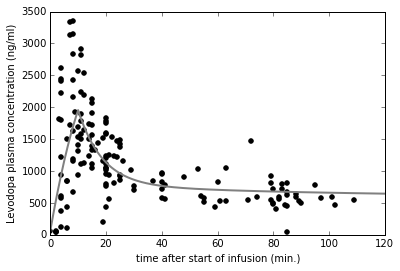

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(figtimes,figconcs,color='black')
plt.plot(modelt, modelp,color='gray',marker=None,linewidth=2)
plt.axis((graphstart,graphend,0,3500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')

##Now I need to fit those parameters once more and I'm almost there.

The following times come from average times and data from LD infusions in Black et al 2003. 
See `hysteresis_plotting_3.ipynb` for details.

In [222]:
from scipy.optimize import curve_fit
import math
plottimes=np.asarray([0.0,4.5,9.0,10.0,10.9,15.0,20.1,\
                      24.5,29.7,39.9,57.1,82.0,100.8])
plotconcs=np.asarray([55.4,1226.7,2237.9,(2433.3+2237.9)/2,1822.6,1538.4,1150.9,\
                      1171.4,828.7,779.6,702.1,624.2,589.8])
# 2237.9 is the mean of the actual peaks (whenever drawn, many from 8 minutes) of each subjects
# see hysteresis_plotting_3.ipynb for where the numbers come from.

In [223]:
def fitnew(time,Cp_a0,Cp_a1,Cp_a2,Cinf,bigb,alpha,beta):
    """fitting parameters for Cp(t).

    time = numpy array of t values
    all other parameters: see Cp(t), above.
    """
    tload=10.0
    Cp_peak=Cp_a0+Cp_a1*tload-Cp_a2*tload**2  # i.e. =Cp_early(tload)
    biga=Cp_peak-Cinf-bigb  # i.e. the part of the biexponential drop from Cp_peak to Cinf that isn't bigb
    return np.where(time<0.0,Cp_a0,np.where(time<tload,Cp_a0+Cp_a1*time-Cp_a2*time**2,\
                                Cinf+bigb*np.exp(-beta*(time-tload))+biga*np.exp(-alpha*(time-tload)) ) )
        # i.e., if t<0 return Cp_a0, else if t<tload return a quadratic starting at Cp_a0, 
        #    else return biexponential starting at Cpeak = (quadratic at t=tload)

In [224]:
popt, pcov = curve_fit(fitnew,plottimes,plotconcs,p0=[55.4,250,6,600,200,ln2/6,ln2/60])
print(popt)

[  5.08e+01   2.92e+02   6.03e+00   6.20e+02   1.29e+03   2.49e+01
   7.45e-02]


In [225]:
print(ln2/2.49384638e+01 , ln2/7.44993704e-02)

(0.02779430145011359, 9.304067629542615)


In [226]:
popt, pcov = curve_fit(fitnew,plottimes,plotconcs,p0=[51,292,6.03,620,1291,ln2/3,ln2/30])
print(popt)

[  5.08e+01   2.92e+02   6.03e+00   6.20e+02   1.29e+03   2.80e+01
   7.45e-02]


In [227]:
print(ln2/2.80065192e+01 , ln2/7.44993631e-02)

(0.024749494059224084, 9.30406854122415)


[ 2369.49   620.16]


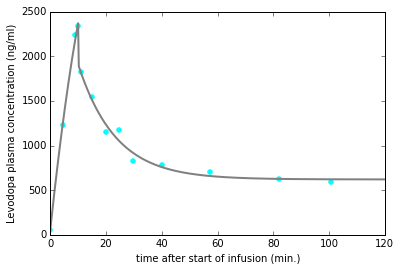

In [228]:
plt.scatter(plottimes,plotconcs,color='cyan')
plt.plot(modelt, fitnew(modelt,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6]),\
         color='gray',marker=None,linewidth=2)
plt.axis((graphstart,graphend,0,2500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
print(fitnew(np.asarray([10,480]),popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6]))
    # model output at t=10 and t=480min.

In [229]:
SSE=np.sum((fitnew(plottimes,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6])-plotconcs)**2)
print(fitnew(plottimes,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6])-plotconcs)
print('summed squared error = {0:,.1f}'.format(SSE))

[  -4.6    16.73  -46.02   33.89    4.82  -28.74   77.59 -112.93   88.99
  -20.28  -43.3     2.     31.85]
summed squared error = 34,414.6


## One more try at getting rid of that annoying early peak

In [230]:
from scipy.optimize import curve_fit
import math
plottimes=np.asarray([0.0,4.5,10.0,10.9,15.0,20.1,\
                      24.5,29.7,39.9,57.1,82.0,100.8])
plotconcs=np.asarray([55.4,1226.7,(2433.3+2237.9)/2,1822.6,1538.4,1150.9,\
                      1171.4,828.7,779.6,702.1,624.2,589.8])
# see hysteresis_plotting_3.ipynb for where the numbers come from. Here I omit (9.0,2237.9) \
# in favor of an estimate for t=10min.

In [231]:
def fitnew(time,Cp_a0,Cp_a1,Cp_a2,Cinf,bigb,alpha,beta):
    """fitting parameters for Cp(t).

    time = numpy array of t values
    all other parameters: see Cp(t), above.
    """
    tload=10.0
    Cp_peak=Cp_a0+Cp_a1*tload-Cp_a2*tload**2  # i.e. =Cp_early(tload)
    biga=Cp_peak-Cinf-bigb  # i.e. the part of the biexponential drop from Cp_peak to Cinf that isn't bigb
    return np.where(time<0.0,Cp_a0,np.where(time<tload,Cp_a0+Cp_a1*time-Cp_a2*time**2,\
                                Cinf+bigb*np.exp(-beta*(time-tload))+biga*np.exp(-alpha*(time-tload)) ) )
        # i.e., if t<0 return Cp_a0, else if t<tload return a quadratic starting at Cp_a0, 
        #    else return biexponential starting at Cpeak = (quadratic at t=tload)

In [232]:
popt, pcov = curve_fit(fitnew,plottimes,plotconcs,p0=[55.4,250,6,600,200,ln2/6,ln2/60])
print(popt)

[  5.54e+01   2.87e+02   5.87e+00   6.20e+02   1.29e+03   3.65e+01
   7.45e-02]


In [233]:
print(ln2/popt[5] , ln2/ln2/popt[6])

(0.018976637733226324, 13.422922293497694)


In [234]:
popt, pcov = curve_fit(fitnew,plottimes,plotconcs,p0=[55.4,287,5.867,620,1291,ln2/4,ln2/90])
print(popt)

[  5.54e+01   2.87e+02   5.87e+00   6.20e+02   1.29e+03   2.97e+01
   7.45e-02]


In [235]:
print(ln2/popt[5] , ln2/ln2/popt[6])

(0.023305059551979826, 13.422933885985385)


### Hm. Not working. Try forcing beta.

In [236]:
def fitnew2(time,Cp_a0,Cp_a1,Cp_a2,Cinf,bigb,alpha):  # forcing beta
    """fitting parameters for Cp(t).

    time = numpy array of t values
    all other parameters: see Cp(t), above.
    """
    tload=10.0
    beta=ln2/45
    Cp_peak=Cp_a0+Cp_a1*tload-Cp_a2*tload**2  # i.e. =Cp_early(tload)
    biga=Cp_peak-Cinf-bigb  # i.e. the part of the biexponential drop from Cp_peak to Cinf that isn't bigb
    return np.where(time<0.0,Cp_a0,np.where(time<tload,Cp_a0+Cp_a1*time-Cp_a2*time**2,\
                                Cinf+bigb*np.exp(-beta*(time-tload))+biga*np.exp(-alpha*(time-tload)) ) )
        # i.e., if t<0 return Cp_a0, else if t<tload return a quadratic starting at Cp_a0, 
        #    else return biexponential starting at Cpeak = (quadratic at t=tload)

In [237]:
popt, pcov = curve_fit(fitnew2,plottimes,plotconcs,p0=[55.4,250,6,600,200,ln2/6])
print(popt)
print(ln2/popt[5])

[  5.54e+01   2.99e+02   8.67e+00   4.31e+02   5.79e+02   1.54e-01]
4.50859697528


In [239]:
popt, pcov = curve_fit(fitnew2,plottimes,plotconcs,p0=[popt[0],popt[1],popt[2],popt[3],popt[4],ln2/6])
print(popt)
print(ln2/popt[5])

[  5.54e+01   2.99e+02   8.67e+00   4.31e+02   5.79e+02   1.54e-01]
4.50860337556


In [240]:
plt.scatter(plottimes,plotconcs,color='cyan',linewidths=3.0)
plt.plot(modelt, fitnew2(modelt,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]),\
         color='gray',marker=None,linewidth=2)
plt.axis((graphstart,graphend,0,2500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
print(fitnew2(np.asarray([10,480]),popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]))
    # model output at t=10 and t=480min.

[ 2181.39   431.65]


**Note: The next line changes default numpy print options. To reset them to defaults, use [this code](http://docs.scipy.org/doc/numpy/reference/generated/numpy.set_printoptions.html):**
```
np.set_printoptions(edgeitems=3,infstr='inf',
linewidth=75, nanstr='nan', precision=8,
suppress=False, threshold=1000, formatter=None)
```

In [241]:
np.set_printoptions(precision=2)
SSE=np.sum((fitnew2(plottimes,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])-plotconcs)**2)
print(fitnew2(plottimes,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])-plotconcs)
print('summed squared error = {0:,.1f}'.format(SSE))

[ -4.35e-06   1.32e-05  -1.54e+02   2.00e+02  -2.79e+01   2.41e+01
  -1.51e+02   8.70e+01   2.90e+01   1.05e+01  -1.80e+00  -1.55e+01]
summed squared error = 96,428.2


###Try again with the 9-minute value in place.
Also used the extrapolated value for 10 minutes. Recall **this uses a fixed value of 45min for ln2/beta.**

In [242]:
plottimes=np.asarray([0.0,4.5,9.0,10.0,10.9,15.0,20.1,\
                      24.5,29.7,39.9,57.1,82.0,100.8])
plotconcs=np.asarray([55.4,1226.7,2237.9,2433.3,1822.6,1538.4,1150.9,\
                      1171.4,828.7,779.6,702.1,624.2,589.8])

In [243]:
popt, pcov = curve_fit(fitnew2,plottimes,plotconcs,p0=[55.4,250,6,600,200,ln2/6])
print(popt)
print(ln2/popt[5])

[  4.69e+01   3.04e+02   7.78e+00   3.67e+02   7.51e+02   2.18e-01]
3.18533512093


In [244]:
popt, pcov = curve_fit(fitnew2,plottimes,plotconcs,p0=[popt[0],popt[1],popt[2],popt[3],popt[4],ln2/6])
print('Parameters Cp_a0, Cp_a1, Cp_a2,\n\t   Cinf, bigb, alpha,\t followed by ln2/alpha:')
print(popt,'{0:.2f}'.format(ln2/popt[5]))

Parameters Cp_a0, Cp_a1, Cp_a2,
	   Cinf, bigb, alpha,	 followed by ln2/alpha:
(array([  4.69e+01,   3.04e+02,   7.78e+00,   3.67e+02,   7.51e+02,
         2.18e-01]), '3.19')


In [245]:
plt.scatter(plottimes,plotconcs,color='cyan',linewidths=3.0)
plt.plot(modelt, fitnew2(modelt,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]),\
         color='gray',marker=None,linewidth=2)
plt.axis((graphstart,graphend,0,2500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
print('model([10min,480min])={0}'.format\
      (fitnew2(np.asarray([10,480]),popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])) )
    # model output at t=10 and t=480min.

model(in,480min])=[ 2309.17   367.92]


In [246]:
SSE=np.sum((fitnew2(plottimes,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])-plotconcs)**2)
print(fitnew2(plottimes,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])-plotconcs)
print('summed squared error = {0:,.1f}'.format(SSE))

[  -8.49   30.87  -84.91 -124.13  264.51  -74.27   -8.15 -152.24  109.82
   63.68   29.09   -8.93  -36.86]
summed squared error = 140,766.7


### Once more with a different beta.

In [259]:
betatry=ln2/35
def fitnew2(time,Cp_a0,Cp_a1,Cp_a2,Cinf,bigb,alpha):  # forcing beta
    """fitting parameters for Cp(t).

    time = numpy array of t values
    all other parameters: see Cp(t), above.
    """
    tload=10.0
    beta=betatry
    Cp_peak=Cp_a0+Cp_a1*tload-Cp_a2*tload**2  # i.e. =Cp_early(tload)
    biga=Cp_peak-Cinf-bigb  # i.e. the part of the biexponential drop from Cp_peak to Cinf that isn't bigb
    return np.where(time<0.0,Cp_a0,np.where(time<tload,Cp_a0+Cp_a1*time-Cp_a2*time**2,\
                                Cinf+bigb*np.exp(-beta*(time-tload))+biga*np.exp(-alpha*(time-tload)) ) )
        # i.e., if t<0 return Cp_a0, else if t<tload return a quadratic starting at Cp_a0, 
        #    else return biexponential starting at Cpeak = (quadratic at t=tload)

In [260]:
popt, pcov = curve_fit(fitnew2,plottimes,plotconcs,p0=[55.4,250,6,600,200,ln2/6])
print('Parameters Cp_a0, Cp_a1, Cp_a2, Cinf, bigb, alpha, followed by ln2/alpha:')
print(popt,'{0:.1f}'.format(ln2/popt[5]))

Parameters Cp_a0, Cp_a1, Cp_a2, Cinf, bigb, alpha, followed by ln2/alpha:
(array([  4.78e+01,   3.01e+02,   7.40e+00,   4.17e+02,   7.88e+02,
         2.62e-01]), '2.6')


In [261]:
popt, pcov = curve_fit(fitnew2,plottimes,plotconcs,p0=[popt[0],popt[1],popt[2],popt[3],popt[4],ln2/6])
print('Parameters Cp_a0, Cp_a1, Cp_a2, Cinf, bigb, alpha, followed by ln2/alpha:')
print(popt,'{0:.1f}'.format(ln2/popt[5]))

Parameters Cp_a0, Cp_a1, Cp_a2, Cinf, bigb, alpha, followed by ln2/alpha:
(array([  4.78e+01,   3.01e+02,   7.40e+00,   4.17e+02,   7.88e+02,
         2.62e-01]), '2.6')


In [262]:
plt.scatter(plottimes,plotconcs,color='cyan',linewidths=3.0)
plt.plot(modelt, fitnew2(modelt,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]),\
         color='gray',marker=None,linewidth=2)
plt.axis((graphstart,graphend,0,2500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
print('model([10min,480min])={0}'.format\
      (fitnew2(np.asarray([10,480]),popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])) )
    # model output at t=10 and t=480min.
SSE=np.sum((fitnew2(plottimes,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])-plotconcs)**2)
print('summed squared error = {0:,.1f}'.format(SSE))

model(in,480min])=[ 2322.51   417.29]
summed squared error = 137,059.0


### Summary:
beta=ln2/45    -> Cpeak=2309, Cinf=367, SSE=140,766.7

betatry=ln2/90 -> Cpeak=2297, Cinf=131, SSE=145,375.6

betatry=ln2/30 -> Cpeak=2427, Cinf=374, SSE=123,269.9

betatry=ln2/35 -> Cpeak=2322, Cinf=417, SSE=137,059.0

**Yeah.** I'm beginning to see why the [LMFIT approach](http://lmfit.github.io/lmfit-py/) is so needed.

## Trying with all data.

In [266]:
betatry=ln2/35
def fitnew2(time,Cp_a0,Cp_a1,Cp_a2,Cinf,bigb,alpha):  # forcing beta
    """fitting parameters for Cp(t).

    time = numpy array of t values
    all other parameters: see Cp(t), above.
    """
    tload=10.0
    beta=betatry
    Cp_peak=Cp_a0+Cp_a1*tload-Cp_a2*tload**2  # i.e. =Cp_early(tload)
    biga=Cp_peak-Cinf-bigb  # i.e. the part of the biexponential drop from Cp_peak to Cinf that isn't bigb
    return np.where(time<0.0,Cp_a0,np.where(time<tload,Cp_a0+Cp_a1*time-Cp_a2*time**2,\
                                Cinf+bigb*np.exp(-beta*(time-tload))+biga*np.exp(-alpha*(time-tload)) ) )
        # i.e., if t<0 return Cp_a0, else if t<tload return a quadratic starting at Cp_a0, 
        #    else return biexponential starting at Cpeak = (quadratic at t=tload)

popt, pcov = curve_fit(fitnew2,figtimes,figconcs,p0=[55.4,250,6,600,200,ln2/6])
popt, pcov = curve_fit(fitnew2,figtimes,figconcs,p0=[popt[0],popt[1],popt[2],popt[3],popt[4],ln2/6])

Parameters Cp_a0, Cp_a1, Cp_a2, Cinf, bigb, alpha, followed by ln2/alpha:
(array([ -3.27e+02,   5.00e+02,   2.74e+01,   5.11e+02,   4.40e+02,
         1.00e-01]), '6.9')
('model(in,480min])= ', array([ 1928.97,   511.14]))
summed squared error = 535,044.4


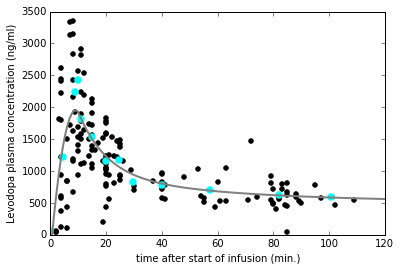

In [267]:
plt.scatter(figtimes,figconcs,color='black')
plt.axis((graphstart,graphend,0,3500))
plt.scatter(plottimes,plotconcs,color='cyan',linewidths=3.0)
plt.plot(modelt, fitnew2(modelt,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]),\
         color='gray',marker=None,linewidth=2)
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')

print('Parameters Cp_a0, Cp_a1, Cp_a2, Cinf, bigb, alpha, followed by ln2/alpha:')
print(popt,'{0:.1f}'.format(ln2/popt[5]))
print('model([10min,480min])= ',\
      (fitnew2(np.asarray([10,480]),popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])) )
    # model output at t=10 and t=480min.
SSE=np.sum((fitnew2(plottimes,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])-plotconcs)**2)
print('summed squared error = {0:,.1f}'.format(SSE))

**Huh.** Not that pretty on the 0- to 10-minute phase, but nice thereafter. 

**Note**, underestimates the baseline data from 10 people, replaced by one dot at t=0.

## Fit early curve separately.

In [283]:
print(plottimes[:3],plotconcs[:3])

(array([ 0. ,  4.5,  9. ]), array([   55.4,  1226.7,  2237.9]))


In [414]:
earlytimes=np.asarray([0,4.5,10])
earlyconcs=np.asarray([55.4,1226.7,(2237.9+2433.3)/2])
print(earlytimes, earlyconcs)

(array([  0. ,   4.5,  10. ]), array([   55.4,  1226.7,  2335.6]))


In [415]:
def fitearly(time,Cp_a0,Cp_a1,Cp_a2):
    """fitting parameters for Cp(t) for t<10min only.

    time = numpy array of t values
    all other parameters: see Cp(t), above.
    """
    tload=10.0
    return Cp_a0+Cp_a1*time-Cp_a2*time**2

popt, pcov = curve_fit(fitearly,earlytimes,earlyconcs,p0=[55.4,250,6])

In [417]:
np.set_printoptions(edgeitems=3,infstr='inf',
linewidth=75, nanstr='nan', precision=8,
suppress=False, threshold=1000, formatter=None)

In [419]:
plt.scatter(figtimes,figconcs,color='black')
plt.axis((graphstart,graphend,0,3500))
plt.scatter(plottimes,plotconcs,color='cyan',linewidths=3.0)
plt.plot(modelt[:(1+4*10)], fitearly(modelt[:(1+4*10)],popt[0],popt[1],popt[2]),\
         color='gray',marker=None,linewidth=2)
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
plt.title('Model fit to cyan points at t=0, 4.5 and 10min')

print('Parameters Cp_a0, Cp_a1, Cp_a2:', popt)
print('model([0min, 4.5min, 9min, 10min])= ',\
      (fitearly(np.asarray([0,4.5,9,10,480]),popt[0],popt[1],popt[2])) )
SSE=np.sum((fitearly(earlytimes,popt[0],popt[1],popt[2])-earlyconcs)**2)
print('summed squared error = {0:,.1f}'.format(SSE))
print('rms error = {0:,.1f}'.format(math.sqrt(SSE/earlytimes.size)))

('Parameters Cp_a0, Cp_a1, Cp_a2:', array([  55.4       ,  286.69070707,    5.86707071]))
('model(in, 4.5min, 9min, 10min])= ', array([  5.54000000e+01,   1.22670000e+03,   2.16038364e+03,
         2.33560000e+03,  -1.21410615e+06]))
summed squared error = 0.0
rms error = 0.0


In [422]:
indices=(figtimes<=10.0)
indices # array of Boolean
early2times=figtimes[indices]
print(early2times.size)
early2concs=figconcs[indices]

def fitearly2(time,Cp_a0,Cp_peak):
    """Fitting parameters for Cp(t) for t<=10min only, enforcing vertex at t=tload.

    time = numpy array of t values
    Cp_peak: Cp(tload). Cp_a0: Cp(0).
    """
    tload=10.0
    return Cp_peak-(Cp_peak-Cp_a0)*(time/tload-1.0)**2

popt, pcov = curve_fit(fitearly2,early2times,early2concs,p0=[55.4,2335.6])

40


('Parameters Cp_a0, Cp_peak:', array([ -133.69054875,  1934.40891038]))
('model(in, 4.5min, 9min, 10min, 480min])= ', array([ -1.33690549e+02,   1.30880882e+03,   1.91372792e+03,
         1.93440891e+03,  -4.56649730e+06]))
summed squared error = 30,035,550.5
rms error = 866.5


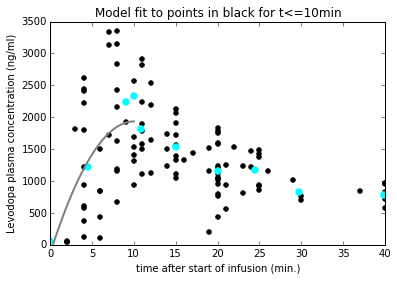

In [423]:
plt.scatter(figtimes,figconcs,color='black')
plt.axis((graphstart,40,0,3500))
plt.scatter(plottimes,plotconcs,color='cyan',linewidths=3.0)
plt.plot(modelt[:(1+4*10)], fitearly2(modelt[:(1+4*10)],popt[0],popt[1]),\
         color='gray',marker=None,linewidth=2)
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
plt.title('Model fit to points in black for t<=10min')

print('Parameters Cp_a0, Cp_peak:', popt)
print('model([0min, 4.5min, 9min, 10min, 480min])= ',\
      (fitearly2(np.asarray([0,4.5,9,10,480]),popt[0],popt[1])) )
SSE=np.sum((fitearly2(early2times,popt[0],popt[1])-early2concs)**2)
print('summed squared error = {0:,.1f}'.format(SSE))
print('rms error = {0:,.1f}'.format(math.sqrt(SSE/early2times.size)))

In [421]:
print(2160.0/2238-1, 1309.0/1227-1)

(-0.034852546916890104, 0.06682966585167072)


###Summary:

**fit to cyan:**  Parameters Cp_a0, Cp_a1, Cp_a2: 55.4, ~286.7, ~5.87; rms error 0.0. ***I.e., fits 0, 4.5, and 10-min estimates exactly,*** and fits OK at t=9min (2160 vs 2238, -3.5%).

**fit to black:** Parameters Cp_a0, Cp_peak: -134, 1934; rms error 866.5.  *I.e., fits neither expected endpoint but is close at 4.5min (1309, vs. 1227, +6.7%).*

Oh, yeah. The (0,55.4) point counts just once in the black dots whereas it should be replaced with the 10 or so PD subjects with baseline [LD]s that averaged out to 55.4. *** => COULD REVISIT THIS IF DESIRED. <=***

## OK, stop it already. Good enough. Use the fit-to-cyan model.
## Now fit the late curve.

In [378]:
indices=(figtimes>=10.0)
indices # array of Boolean
latetimes=figtimes[indices]
lateconcs=figconcs[indices]
print figtimes.size, latetimes.size

149 115


In [379]:
betatry=ln2/90

def fitlate(time,Cinf,bigb,alpha):  # forcing beta
    """fitting parameters for Cp(t).

    time = numpy array of t values
    all other parameters: see Cp(t), above.
    """
    tload=10.0
    Cp_a0=55.4
    Cp_a1=286.69070707
    Cp_a2=5.86707071  # from fitting, just above.
    Cp_peak=Cp_a0+Cp_a1*tload-Cp_a2*tload**2  # i.e. =Cp_early(tload)
    beta=betatry
    biga=Cp_peak-Cinf-bigb  # i.e. the part of the biexponential drop from Cp_peak to Cinf that isn't bigb
    return np.where(time<0.0,Cp_a0,np.where(time<tload,Cp_a0+Cp_a1*time-Cp_a2*time**2,\
                                Cinf+bigb*np.exp(-beta*(time-tload))+biga*np.exp(-alpha*(time-tload)) ) )
        # i.e., if t<0 return Cp_a0, else if t<tload return a quadratic starting at Cp_a0, 
        #    else return biexponential starting at Cpeak = (quadratic at t=tload)

popt, pcov = curve_fit(fitlate,latetimes,lateconcs,p0=[600,200,ln2/6])
print('Parameters Cinf, bigb, alpha, followed by ln2/alpha:')
print(popt,'{0:.1f}'.format(ln2/popt[2]))

Parameters Cinf, bigb, alpha, followed by ln2/alpha:
(array([ -5.62416225e+01,   1.16452256e+03,   2.07864258e-01]), '3.3')


In [380]:
popt, pcov = curve_fit(fitlate,latetimes,lateconcs,p0=[popt[0],popt[1],ln2/6])
print('Parameters Cinf, bigb, alpha, followed by ln2/alpha:')
print(popt,'{0:.1f}'.format(ln2/popt[2]))

Parameters Cinf, bigb, alpha, followed by ln2/alpha:
(array([ -5.62532870e+01,   1.16454191e+03,   2.07868020e-01]), '3.3')


('Parameters Cinf,bigb,alpha, then ln2/alpha:', array([ -5.62532870e+01,   1.16454191e+03,   2.07868020e-01]), 3.3345542101414529)
('model(in, 480min])= ', array([ 2335.5999997 ,   -25.05651998]))
summed squared error = 17,745,204.0
rms error = 392.82


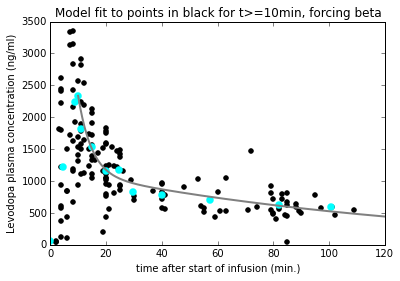

In [381]:
plt.scatter(figtimes,figconcs,color='black')
plt.axis((graphstart,graphend,0,3500))
plt.scatter(plottimes,plotconcs,color='cyan',linewidths=3.0)
plt.plot(modelt[(4*10):], fitlate(modelt[(4*10):],popt[0],popt[1],popt[2]),\
         color='gray',marker=None,linewidth=2)
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
plt.title('Model fit to points in black for t>=10min, forcing beta')

print('Parameters Cinf,bigb,alpha, then ln2/alpha:', popt, ln2/popt[-1])
print('model([10min, 480min])= ',\
      (fitlate(np.asarray([10,480]),popt[0],popt[1],popt[2])) )
SSE=np.sum((fitlate(latetimes,popt[0],popt[1],popt[2])-lateconcs)**2)
print('summed squared error = {0:,.1f}'.format(SSE))
print('rms error = {0:,.2f}'.format(math.sqrt(SSE/latetimes.size)))

In [382]:
def fitlate2(time,Cinf,bigb,alpha,beta):  
    """fitting parameters for Cp(t).

    time = numpy array of t values
    all other parameters: see Cp(t), above.
    """
    tload=10.0
    Cp_a0=55.4
    Cp_a1=286.69070707
    Cp_a2=5.86707071  # from fitting, just above.
    Cp_peak=Cp_a0+Cp_a1*tload-Cp_a2*tload**2  # i.e. =Cp_early(tload)
    biga=Cp_peak-Cinf-bigb  # i.e. the part of the biexponential drop from Cp_peak to Cinf that isn't bigb
    return np.where(time<0.0,Cp_a0,np.where(time<tload,Cp_a0+Cp_a1*time-Cp_a2*time**2,\
                                Cinf+bigb*np.exp(-beta*(time-tload))+biga*np.exp(-alpha*(time-tload)) ) )
        # i.e., if t<0 return Cp_a0, else if t<tload return a quadratic starting at Cp_a0, 
        #    else return biexponential starting at Cpeak = (quadratic at t=tload)

popt, pcov = curve_fit(fitlate2,latetimes,lateconcs,p0=[600,200,ln2/6,ln2/90])
print('Parameters Cinf, bigb, alpha, beta, followed by ln2/alpha and ln2/beta:')
print(popt,'{0:.1f}, {1:.1f}'.format(ln2/popt[-2],ln2/popt[-1]))

Parameters Cinf, bigb, alpha, beta, followed by ln2/alpha and ln2/beta:
(array([  5.77158242e+02,   9.49662374e+02,   3.49678645e-01,
         4.51002650e-02]), '2.0, 15.4')


In [383]:
popt, pcov = curve_fit(fitlate2,latetimes,lateconcs,p0=[popt[0],popt[1],ln2/6,ln2/90])
print('Parameters Cinf, bigb, alpha, beta, followed by ln2/alpha and ln2/beta:')
print(popt,'{0:.1f}, {1:.1f}'.format(ln2/popt[-2],ln2/popt[-1]))

Parameters Cinf, bigb, alpha, beta, followed by ln2/alpha and ln2/beta:
(array([  5.77144039e+02,   9.49610835e+02,   3.49642935e-01,
         4.50951082e-02]), '2.0, 15.4')


Parameters Cinf,bigb,alpha, beta, followed by ln2/alpha and ln2/beta:
(array([  5.77144039e+02,   9.49610835e+02,   3.49642935e-01,
         4.50951082e-02]), '2.0, 15.4')
('model(in, 480min])= ', array([ 2335.5999997 ,   577.14403966]))
summed squared error = 17,639,086.7
rms error = 391.64


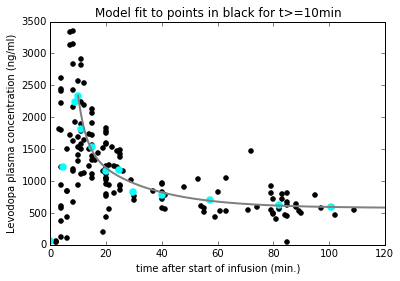

In [384]:
plt.scatter(figtimes,figconcs,color='black')
plt.axis((graphstart,graphend,0,3500))
plt.scatter(plottimes,plotconcs,color='cyan',linewidths=3.0)
plt.plot(modelt[(4*10):], fitlate2(modelt[(4*10):],popt[0],popt[1],popt[2],popt[3]),\
         color='gray',marker=None,linewidth=2)
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
plt.title('Model fit to points in black for t>=10min')

print('Parameters Cinf,bigb,alpha, beta, followed by ln2/alpha and ln2/beta:')
print(popt,'{0:.1f}, {1:.1f}'.format(ln2/popt[-2],ln2/popt[-1]))
print('model([10min, 480min])= ',\
      (fitlate2(np.asarray([10,480]),popt[0],popt[1],popt[2],popt[3])) )
SSE=np.sum((fitlate2(latetimes,popt[0],popt[1],popt[2],popt[3])-lateconcs)**2)
print('summed squared error = {0:,.1f}'.format(SSE))
print('rms error = {0:,.2f}'.format(math.sqrt(SSE/latetimes.size)))

### And once fit to the globbed points

In [385]:
lateptimes=plottimes[3:]
latepconcs=plotconcs[3:]
latepconcs[0]=(2237.9+2433.3)/2
lateptimes,latepconcs

(array([  10. ,   10.9,   15. ,   20.1,   24.5,   29.7,   39.9,   57.1,
          82. ,  100.8]),
 array([ 2335.6,  1822.6,  1538.4,  1150.9,  1171.4,   828.7,   779.6,
          702.1,   624.2,   589.8]))

In [386]:
popt, pcov = curve_fit(fitlate2,lateptimes,latepconcs,p0=[600,200,ln2/6,ln2/90])
print('Parameters Cinf, bigb, alpha, beta, followed by ln2/alpha and ln2/beta:')
print(popt,'{0:.1f}, {1:.1f}'.format(ln2/popt[-2],ln2/popt[-1]))

Parameters Cinf, bigb, alpha, beta, followed by ln2/alpha and ln2/beta:
(array([  6.20159269e+02,   1.29098367e+03,   2.85919072e+01,
         7.44993614e-02]), '0.0, 9.3')


In [387]:
ln2/2.85919072e+01

0.024242775261943534

In [388]:
popt, pcov = curve_fit(fitlate2,lateptimes,latepconcs,p0=[popt[0],popt[1],ln2/6,ln2/90])
print('Parameters Cinf, bigb, alpha, beta, followed by ln2/alpha and ln2/beta:')
print(popt,'{0:.1f}, {1:.1f}'.format(ln2/popt[-2],ln2/popt[-1]))

Parameters Cinf, bigb, alpha, beta, followed by ln2/alpha and ln2/beta:
(array([  6.20159297e+02,   1.29098368e+03,   2.46860447e+01,
         7.44993711e-02]), '0.0, 9.3')


In [389]:
ln2/popt[-2]

0.028078503044849542

Parameters Cinf,bigb,alpha, beta, followed by ln2/alpha and ln2/beta:
(array([  6.20159297e+02,   1.29098368e+03,   2.46860447e+01,
         7.44993711e-02]), '0.0, 9.3')
('model(in, 480min])= ', array([ 2335.5999997,   620.1592971]))
summed squared error = 30,847.4
rms error = 55.54
summed squared error (black points) = 17,979,659.6
rms error (black points) = 395.40


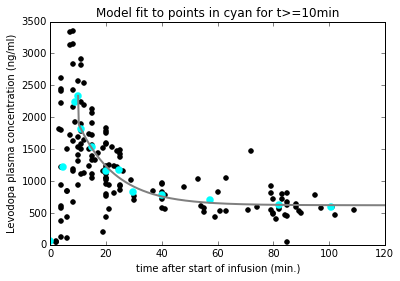

In [393]:
plt.scatter(figtimes,figconcs,color='black')
plt.axis((graphstart,graphend,0,3500))
plt.scatter(plottimes,plotconcs,color='cyan',linewidths=3.0)
plt.plot(modelt[(4*10):], fitlate2(modelt[(4*10):],popt[0],popt[1],popt[2],popt[3]),\
         color='gray',marker=None,linewidth=2)
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
plt.title('Model fit to points in cyan for t>=10min')

print('Parameters Cinf,bigb,alpha, beta, followed by ln2/alpha and ln2/beta:')
print(popt,'{0:.1f}, {1:.1f}'.format(ln2/popt[-2],ln2/popt[-1]))
print('model([10min, 480min])= ',\
      (fitlate2(np.asarray([10,480]),popt[0],popt[1],popt[2],popt[3])) )
SSE=np.sum((fitlate2(lateptimes,popt[0],popt[1],popt[2],popt[3])-latepconcs)**2)
print('summed squared error = {0:,.1f}'.format(SSE))
print('rms error = {0:,.2f}'.format(math.sqrt(SSE/lateptimes.size)))
SSEblack=np.sum((fitlate2(latetimes,popt[0],popt[1],popt[2],popt[3])-lateconcs)**2)
print('summed squared error (black points) = {0:,.1f}'.format(SSEblack))
print('rms error (black points) = {0:,.2f}'.format(math.sqrt(SSEblack/latetimes.size)))

**Nah.** Worse than the previous one.

# Conclusion:

Take the "late" fit from the plot just above the label  **And once fit to the globbed points**.

**Parameters Cp_a0, Cp_a1, Cp_a2:** 

[  55.4       ,  286.69070707,    5.86707071] ,

implying $C_{peak}\approx$ 2335.6, and

**Parameters Cinf, bigb, alpha, beta, followed by ln2/alpha and ln2/beta:**

[  5.77144039e+02,   9.49610835e+02,   3.49642935e-01,  4.50951082e-02], 2.0, 15.4

$\approx$ [ 577, 950, 0.34964, 0.045095 ],  2.0min, 15.4min

# Now. Finally ready to move on to what we really came for: 
##  the exact $C_e(t)$ functions for various values of $k_e$, $EC_{50}$, and $n$.

## See hysteresis_6 for a short detour into `sympy`. 
# Main work continues in hysteresis_7.